In [275]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft
from scipy import interpolate

In [276]:
conv25 = np.genfromtxt('/content/convolucion2_5nsconlasr.txt')
conv5 = np.genfromtxt('/content/convo5nslaser.txt')
gate25 = np.genfromtxt('/content/curva2_5ns.txt')
gate5 = np.genfromtxt('/content/curva5ns.txt')
gate25_81ns = np.genfromtxt('/content/curva2_5ns81ps.txt')
gate5_81ns = np.genfromtxt('/content/curva5ns81ps.txt')

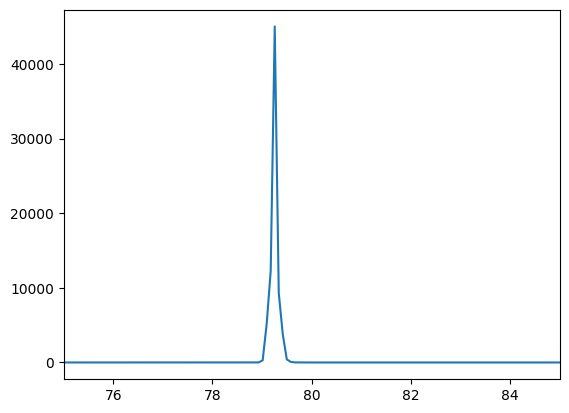

In [277]:
gate25_81ns[:,0] = gate25_81ns[:,0]*1e9
plt.plot(gate25_81ns[:,0], gate25_81ns[:,2])
plt.xlim([75, 85])
plt.show()

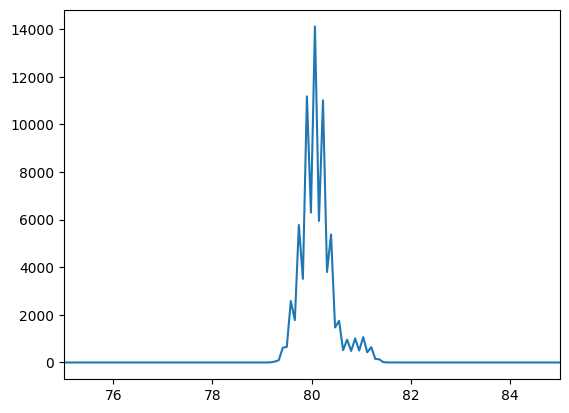

In [278]:
gate5_81ns[:,0] = gate5_81ns[:,0]*1e9
plt.plot(gate5_81ns[:,0], gate5_81ns[:,2])
plt.xlim([75, 85])
plt.show()

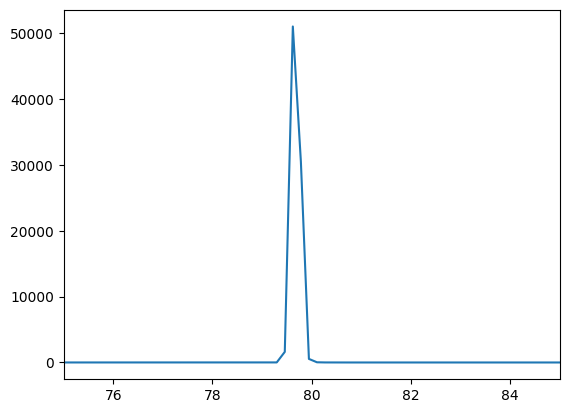

In [279]:
gate25[:,0] = gate25[:,0]*1e9
plt.plot(gate25[:,0], gate25[:,2])
plt.xlim([75, 85])
plt.show()

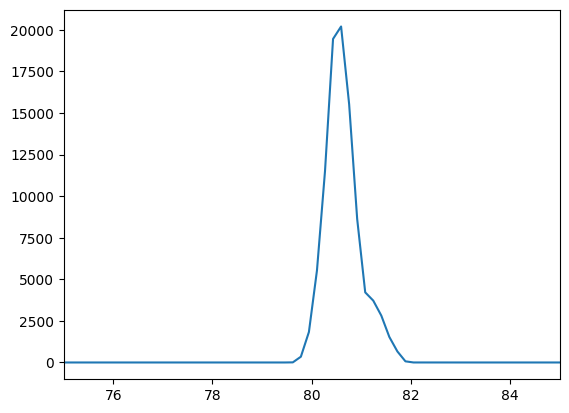

In [280]:
gate5[:,0] = gate5[:,0]*1e9
plt.plot(gate5[:,0], gate5[:,2])
plt.xlim([75, 85])
plt.show()

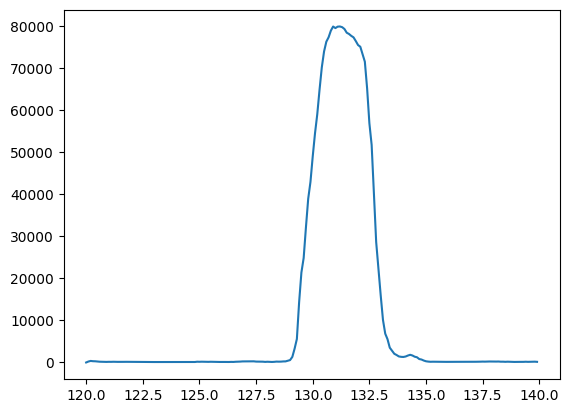

In [281]:
plt.plot(conv25[:,0], conv25[:,1])
plt.show()

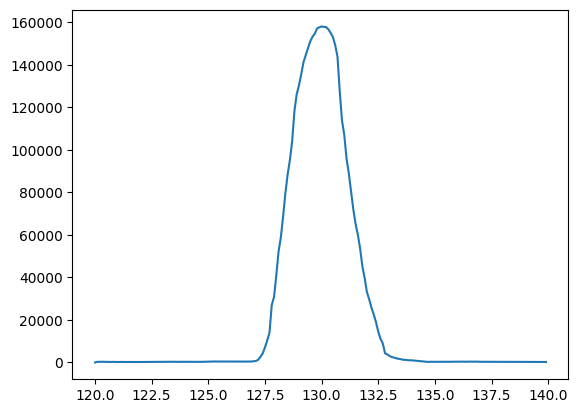

In [282]:
plt.plot(conv5[:,0], conv5[:,1])
plt.show()

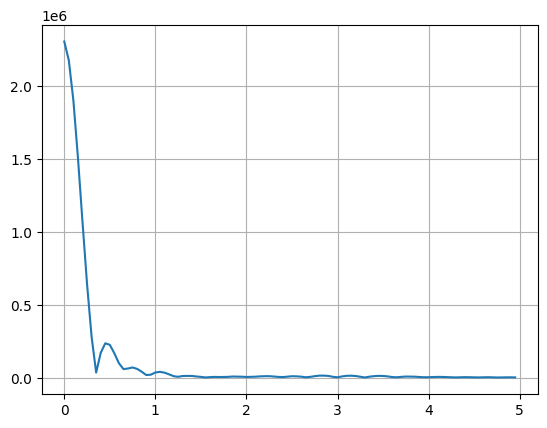

In [283]:
N = len(conv25[:,1]) # Sampling number
T = 0.1
yf_conv25 = fft(conv25[:,1])
xf_conv25 = fftfreq(N, T)[:N//2]
plt.plot(xf_conv25, np.abs(yf_conv25[0:N//2]))
plt.grid()
plt.show()

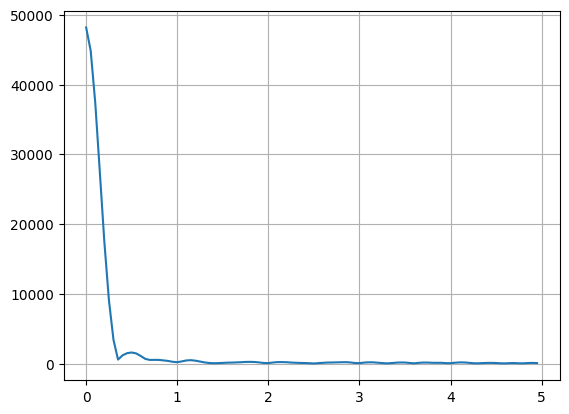

In [284]:
N = len(conv5[:,1]) # Sample
T = 0.1
yf_conv5 = fft(conv5[:,1])
xf_conv5 = fftfreq(N, T)[:N//2]
plt.plot(xf_conv5, 2.0/N * np.abs(yf_conv5[0:N//2]))
plt.grid()
plt.show()

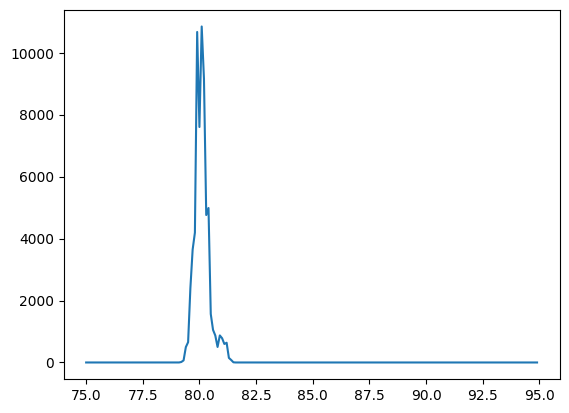

In [285]:
f = interpolate.interp1d(gate5_81ns[:,0], gate5_81ns[:,2])
x5_81ns = np.arange(75, 95, 0.1)
y5_81ns = f(x5_81ns)   # use interpolation function returned by `interp1d`
plt.plot(x5_81ns, y5_81ns)
plt.show()

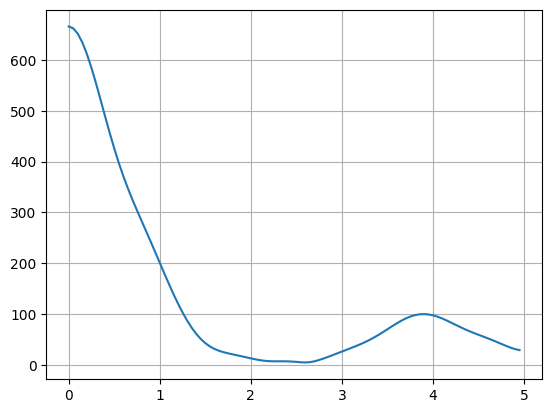

In [286]:
N = len(x5_81ns) # Sample
T = 0.1
yf_gate5_81 = fft(y5_81ns)
xf_gate5_81 = fftfreq(N, T)[:N//2]
plt.plot(xf_gate5_81, 2.0/N * np.abs(yf_gate5_81[0:N//2]))
plt.grid()
plt.show()

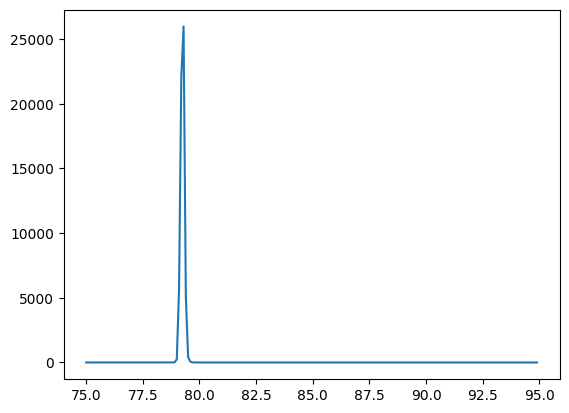

In [287]:
f = interpolate.interp1d(gate25_81ns[:,0], gate25_81ns[:,2])
x25_81ns = np.arange(75, 95, 0.1)
y25_81ns = f(x25_81ns)   # use interpolation function returned by `interp1d`
plt.plot(x25_81ns, y25_81ns)
plt.show()

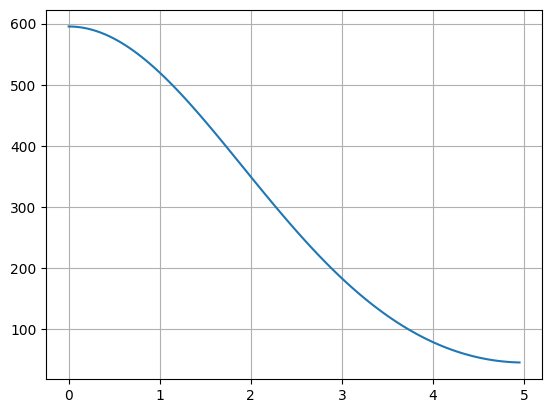

In [288]:
N = len(x25_81ns) # Sample
T = 0.1
yf_gate25_81 = fft(y25_81ns)
xf_gate25_81 = fftfreq(N, T)[:N//2]
plt.plot(xf_gate25_81, 2.0/N * np.abs(yf_gate25_81[0:N//2]))
plt.grid()
plt.show()

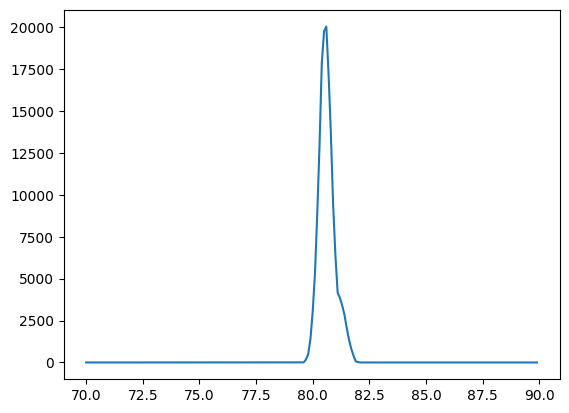

In [289]:
gate5 = gate5[400:600,:]
f = interpolate.interp1d(gate5[:,0], gate5[:,2])
gate5[:,0] = np.arange(70, 90, 0.1)
gate5[:,2] = f(gate5[:,0])   # use interpolation function returned by `interp1d`
plt.plot(gate5[:,0], gate5[:,2])
plt.show()

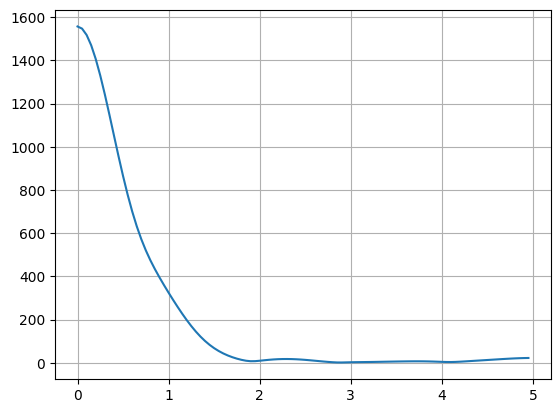

In [290]:
N = len(gate5[:,2]) # Sample
T = 0.1
yf_gate5 = fft(gate5[:,2])
xf_gate5 = fftfreq(N, T)[:N//2]
plt.plot(xf_gate5, 2.0/N * np.abs(yf_gate5[0:N//2]))
plt.grid()
plt.show()

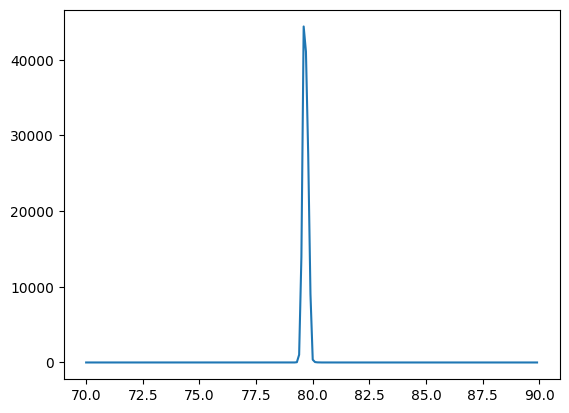

In [291]:
gate25 = gate25[400:600,:]
f = interpolate.interp1d(gate25[:,0], gate25[:,2])
gate25[:,0] = np.arange(70, 90, 0.1)
gate25[:,2] = f(gate25[:,0])   # use interpolation function returned by `interp1d`
plt.plot(gate25[:,0], gate25[:,2])
plt.show()

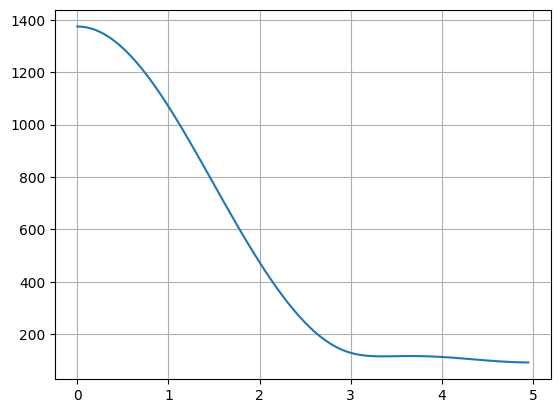

In [292]:
N = len(gate25[:,2]) # Sample
T = 0.1
yf_gate25 = fft(gate25[:,2])
xf_gate25 = fftfreq(N, T)[:N//2]
plt.plot(xf_gate25, 2.0/N * np.abs(yf_gate25[0:N//2]))
plt.grid()
plt.show()

In [293]:
yf_laser5 = yf_conv5 / yf_gate5
yf_laser25 = yf_conv25 / yf_gate25
yf_laser5_81 = yf_conv5 / yf_gate5_81
yf_laser25_81 = yf_conv25 / yf_gate25_81
yf_laser25[8:N]=0
yf_laser5[8:N]=0
yf_laser25_81[8:N]=0
yf_laser5_81[8:N]=0

In [295]:
laser5 = ifft(yf_laser5)
laser25 = ifft(yf_laser25)
laser5_81 = ifft(yf_laser5_81)
laser25_81 = ifft(yf_laser25_81)

In [296]:
laser5 = np.abs(laser5)
laser25 = np.abs(laser25)
laser5_81 = np.abs(laser5_81)
laser25_81 = np.abs(laser25_81)

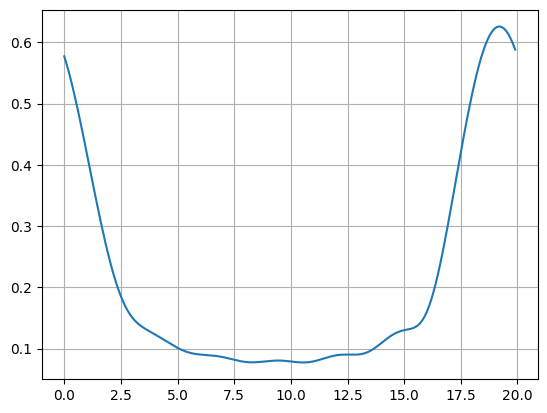

In [297]:
x_laser5 = np.arange(0,20,0.1)
plt.plot(x_laser5, laser5)
plt.grid()
plt.show()

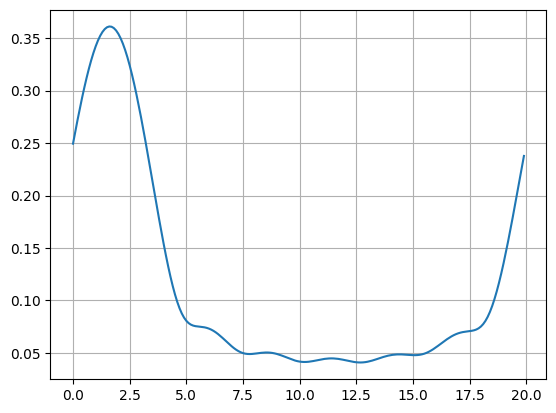

In [298]:
x_laser25 = np.arange(0,20,0.1)
plt.plot(x_laser25, laser25)
plt.grid()
plt.show()

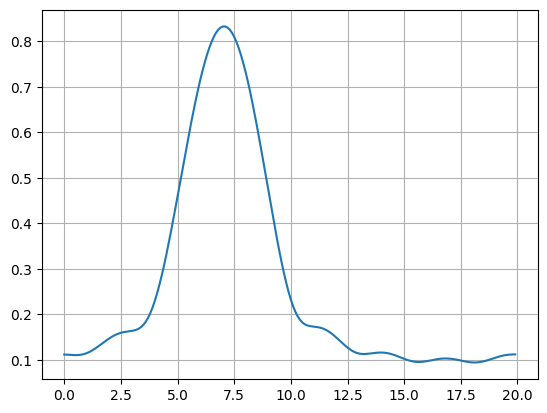

In [299]:
x_laser25_81 = np.arange(0,20,0.1)
plt.plot(x_laser25_81, laser25_81)
plt.grid()
plt.show()

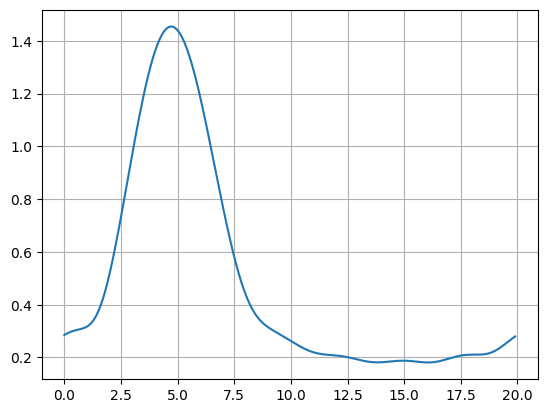

In [300]:
x_laser5_81 = np.arange(0,20,0.1)
plt.plot(x_laser5_81, laser5_81)
plt.grid()
plt.show()